In [1]:
from transformers import SegformerFeatureExtractor
feature_extractor = SegformerFeatureExtractor(reduce_labels=True)



/opt/conda/lib/python3.7/site-packages/transformers/models/segformer/feature_extraction_segformer.py:31: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/models/segformer/image_processing_segformer.py:105: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  FutureWarning,


In [2]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "./custom_checkpoint_2/model_345.pth"
model = torch.load(model_path)
model.to(device)
model.eval()     

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)

In [3]:
from PIL import Image
import cv2
# image = Image.open('./ADE20k_toy_dataset/images/training/ADE_train_00000001.jpg')
# image = Image.open('./ADE20k_toy_dataset/images/validation/ADE_val_00000001.jpg')

# image = Image.open('./test_dataset/SC_PAR_20220831_131850_cam02.jpg')
# image = Image.open('./test_dataset/SC_PAR_20220831_131750_cam01.jpg')
# image = Image.open('./test_dataset/SC_PAR_20220831_131730_cam02.jpg')
# image = Image.open('./custom_dataset/images/training/SC_PAR_20220831_155720_cam02.jpg')
image = Image.open('./custom_dataset/images/training/SC_PAR_20220831_155720_cam01.jpg')


# image.mode

In [4]:
# prepare the image for the model
encoding = feature_extractor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)
print(pixel_values.shape)

torch.Size([1, 3, 512, 512])


In [5]:

# forward pass
# outputs = model(pixel_values=pixel_values)
outputs = model(pixel_values)

# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits.cpu()
print(logits.shape)


# def ade_palette():
#     """ADE20K palette that maps each class to RGB values."""
#     return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
#             [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
#             [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
#             [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
#             [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
#             [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
#             [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
#             [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
#             [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
#             [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
#             [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
#             [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
#             [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
#             [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
#             [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
#             [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
#             [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
#             [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
#             [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
#             [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
#             [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
#             [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
#             [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
#             [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
#             [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
#             [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
#             [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
#             [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
#             [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
#             [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
#             [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
#             [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
#             [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
#             [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
#             [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
#             [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
#             [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
#             [102, 255, 0], [92, 0, 255]]
def ade_palette():
    return [[204, 5, 255], [4, 250, 7], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 10, 255], [255, 5, 153], [180, 120, 120],
            [150, 5, 61], [220, 220, 220], [255, 245, 0], [0, 102, 200]]

torch.Size([1, 13, 128, 128])


seg : tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [7, 7, 7,  ..., 7, 7, 7],
        [7, 7, 7,  ..., 7, 7, 7],
        [7, 7, 7,  ..., 7, 7, 7]]),torch.Size([1080, 1920]),tensor([0, 1, 2, 4, 5, 6, 7])


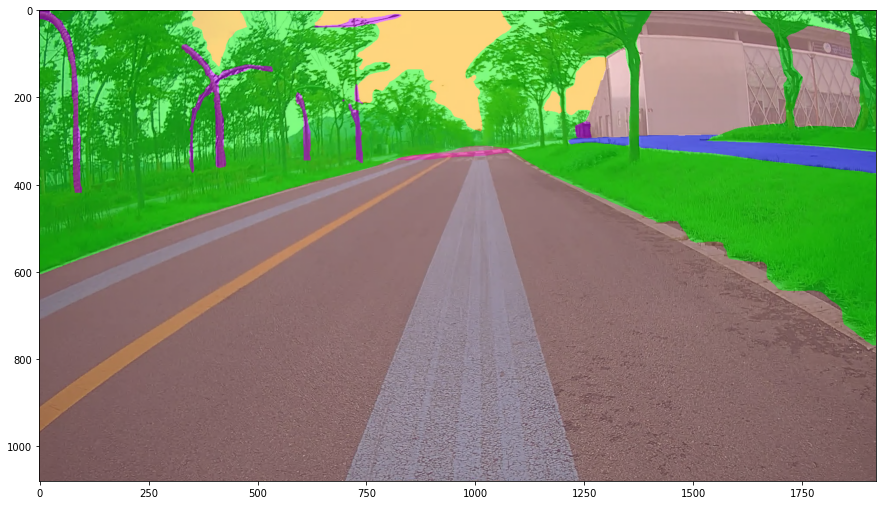

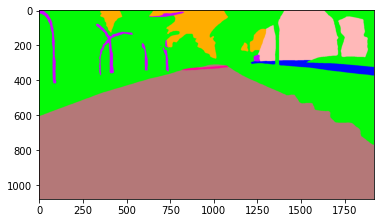

In [6]:
# label_list = {"0": "obstacle" , #보라색
#      "1": "vegetation",  #연두색
#      "2": "void", #주황
#      "3": "truck", #빨강
#      "4": "building", #분홍
#      "5": "sidewalk", #파랑
#      "6": "crosswalk", # 핫핑크
#      "7": "road", # 갈색
#      "8": "pedestrian", #카키색
#      "9": "stone", #회색
#      "10": "bicycle", #노란색
#      "11": "vehicle"} #네이비

from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# First, rescale logits to original image size
upsampled_logits = nn.functional.interpolate(logits,
                size=image.size[::-1], # (height, width)
                mode='bilinear',
                align_corners=False)

# Second, apply argmax on the class dimension
seg = upsampled_logits.argmax(dim=1)[0]


# seg = seg +1


print(f"seg : {seg},{seg.shape},{seg.squeeze().unique()}")




color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
palette = np.array(ade_palette())
for label, color in enumerate(palette): 
    color_seg[seg == label, :] = color
    
# print(color_seg)
# Convert to BGR
# color_seg = color_seg[..., ::-1]

# Show image + mask
# img = np.array(image) * 0.3 + color_seg * 0.7
img = np.array(image) * 0.5 + color_seg * 0.5


img = img.astype(np.uint8)



# save_img_file = "test.png"
# # #     rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert_pil_image = Image.fromarray(img)
# # convert_pil_image = convert_pil_image.convert('L')
# convert_pil_image.save(save_img_file,'png')





# import cv2
# cv2.imwrite("test.jpg",color_seg)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()
plt.imshow(color_seg)
plt.show()